In [39]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from bs4 import BeautifulSoup

In [40]:
ratings = []
for i in range(1, 4):
    rating = pd.read_excel(f'data/jester-data-{i}.xls', header=None)
    rating = rating.iloc[:, 1:].replace(99, float('NaN'))
    ratings.append(rating)

df = pd.concat(ratings)


In [41]:
df.describe

<bound method NDFrame.describe of         1     2     3     4     5     6     7     8     9     10   ...   91   \
0     -7.82  8.79 -9.66 -8.16 -7.52 -8.50 -9.85  4.17 -8.98 -4.76  ...  2.82   
1      4.08 -0.29  6.36  4.37 -2.38 -9.66 -0.73 -5.34  8.88  9.22  ...  2.82   
2       NaN   NaN   NaN   NaN  9.03  9.27  9.03  9.27   NaN   NaN  ...   NaN   
3       NaN  8.35   NaN   NaN  1.80  8.16 -2.82  6.21   NaN  1.84  ...   NaN   
4      8.50  4.61 -4.17 -5.39  1.36  1.60  7.04  4.61 -0.44  5.73  ...  5.19   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
24933   NaN   NaN   NaN   NaN  5.78  8.45   NaN  8.20   NaN  8.50  ...   NaN   
24934   NaN   NaN   NaN   NaN  5.24   NaN   NaN  5.68   NaN   NaN  ...   NaN   
24935   NaN   NaN   NaN   NaN -3.93   NaN -9.03 -2.67   NaN   NaN  ...   NaN   
24936   NaN   NaN   NaN   NaN  9.42  9.66   NaN  9.17   NaN   NaN  ...   NaN   
24937   NaN   NaN   NaN   NaN  0.19   NaN -1.50  7.82   NaN   NaN  ...   NaN   

     

In [42]:
df = df.mean()

In [43]:
df.describe

<bound method NDFrame.describe of 1      0.901997
2      0.162989
3      0.193411
4     -1.412599
5      0.235352
         ...   
96     1.373027
97     1.489106
98     0.869864
99    -0.036189
100    1.116812
Length: 100, dtype: float64>

In [44]:
jokes_data = []

for i in range(1, 101):
    file_name = f'data/jokes/init{i}.html'
    with open(file_name, 'r') as file:
        joke_html = file.read()
        soup = BeautifulSoup(joke_html, 'html.parser')
        joke_text = soup.find('font', size='+1').text.strip()
        jokes_data.append(joke_text)

In [45]:
sentence_transformer = SentenceTransformer('bert-base-cased')
jokes = sentence_transformer.encode(jokes_data)

No sentence-transformers model found with name C:\Users\Kuba/.cache\torch\sentence_transformers\bert-base-cased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at C:\Users\Kuba/.cache\torch\sentence_transformers\bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification

In [46]:
print(jokes)

[[ 0.22689956  0.08085244  0.1937923  ...  0.3482189   0.16816409
   0.22305498]
 [ 0.08381999  0.15879391 -0.1869314  ...  0.24138355 -0.09729489
  -0.13394882]
 [ 0.02886741  0.04255899 -0.07353059 ...  0.244685    0.04791432
  -0.17327294]
 ...
 [ 0.10690021 -0.05922134  0.02530874 ...  0.1629997   0.24382713
  -0.11800069]
 [ 0.44622514 -0.0009988   0.0428177  ...  0.15277798  0.27113083
   0.08587258]
 [-0.12652948 -0.35098827  0.14295383 ...  0.30620822 -0.12334429
  -0.00129421]]


In [47]:
train_X, val_X, train_y, val_y = train_test_split(
    jokes, 
    df, 
    test_size=0.3, 
    random_state=100)
print("Train X shape:", train_X.shape)
print("Train y shape:", train_y.shape)
print("Validation X shape:", val_X.shape)
print("Validation y shape:", val_y.shape)

Train X shape: (70, 768)
Train y shape: (70,)
Validation X shape: (30, 768)
Validation y shape: (30,)


In [51]:
def run_mlp_regressor(learning_rate=0.0001, hidden_layers=(10,), epochs = 250):
    mlp = MLPRegressor(solver='sgd',
                       alpha=0.0,
                       learning_rate='constant',
                       learning_rate_init=learning_rate,
                       hidden_layer_sizes=hidden_layers,
                       random_state=0
                       )
    
    train_loss = []
    validation_loss = []
    
    for _ in range(epochs):
        mlp.partial_fit(train_X, train_y)
        
        pred_train_y = mlp.predict(train_X)
        train_loss.append(mean_squared_error(train_y, pred_train_y))

        pred_val_y = mlp.predict(val_X)
        validation_loss.append(mean_squared_error(val_y, pred_val_y))
        
    return (train_loss, validation_loss)

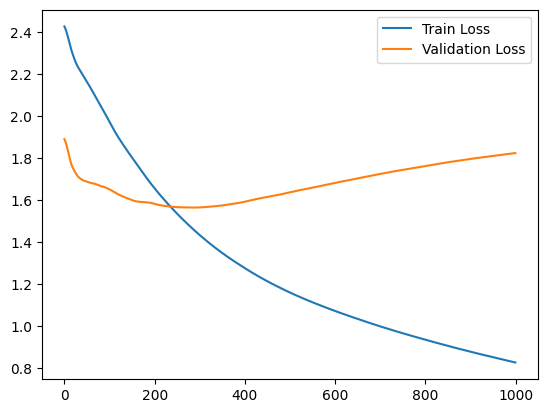

In [52]:
train_loss, validation_loss = run_mlp_regressor(0.0001, (10, ), 1000)

plt.plot(range(len(train_loss)), train_loss, label=f'Train Loss')
plt.plot(range(len(validation_loss)), validation_loss, label=f'Validation Loss')
plt.legend()
plt.show()

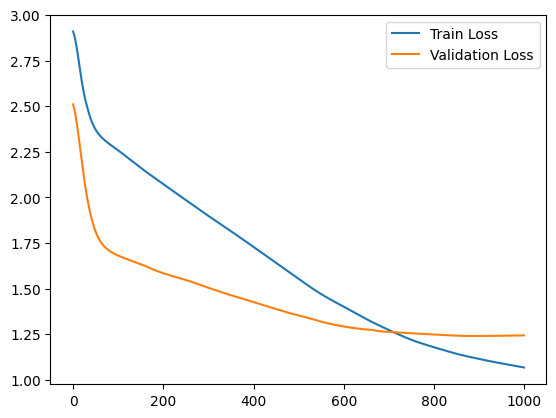

In [53]:
train_loss, validation_loss = run_mlp_regressor(0.0001, (10, 10), 1000)

plt.plot(range(len(train_loss)), train_loss, label=f'Train Loss')
plt.plot(range(len(validation_loss)), validation_loss, label=f'Validation Loss')
plt.legend()
plt.show()

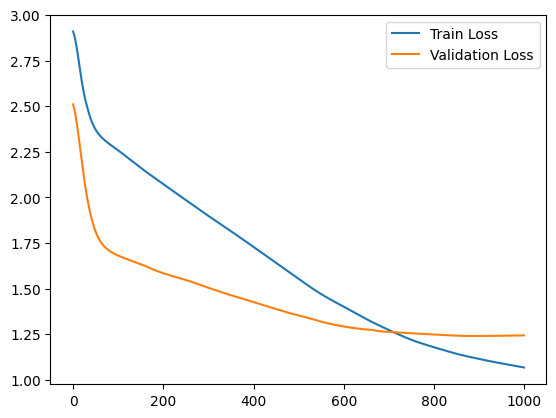

In [54]:
train_loss, validation_loss = run_mlp_regressor(0.0001, (10, 10, 10), 1000)

plt.plot(range(len(train_loss)), train_loss, label=f'Train Loss')
plt.plot(range(len(validation_loss)), validation_loss, label=f'Validation Loss')
plt.legend()
plt.show()

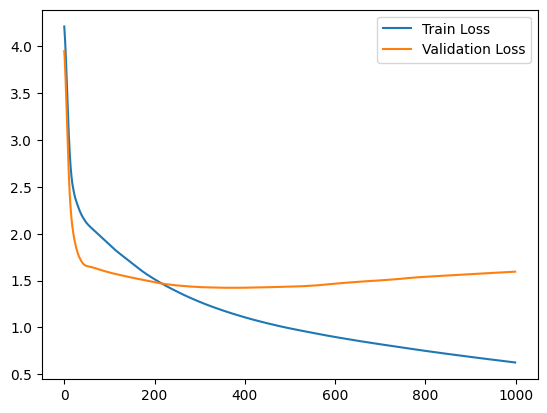

In [55]:
train_loss, validation_loss = run_mlp_regressor(0.0001, (50, 10), 1000)

plt.plot(range(len(train_loss)), train_loss, label=f'Train Loss')
plt.plot(range(len(validation_loss)), validation_loss, label=f'Validation Loss')
plt.legend()
plt.show()

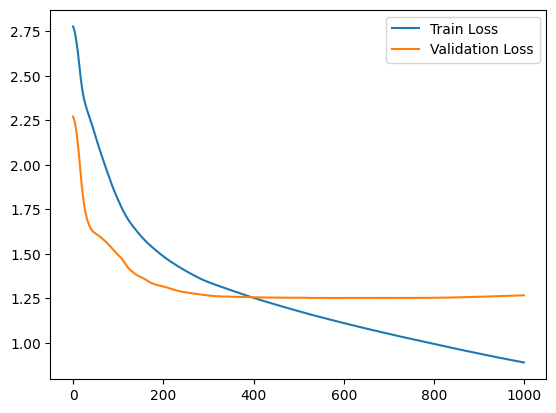

In [56]:
train_loss, validation_loss = run_mlp_regressor(0.0001, (100, 50, 5), 1000)

plt.plot(range(len(train_loss)), train_loss, label=f'Train Loss')
plt.plot(range(len(validation_loss)), validation_loss, label=f'Validation Loss')
plt.legend()
plt.show()